# **Упражнение 4.1**

На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице [http://asoftmurmur.com/about/](http://asoftmurmur.com/about/) приведен перечень записей; большинство из них хранится на [http://freesound.org](http://freesound.org).

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?

**Ход работы**

In [95]:
import os
%pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave, unbias, normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if not os.path.exists('bitstampUSD.csv'):
    !python -m wget https://github.com/pavelminin2002/Telecom/tree/main/Lab4/bitstampUSD.csv

Note: you may need to restart the kernel to use updated packages.

Saved under bitstampUSD.csv


Проанализируем спектры звуков: шум бассейна, ветра и радио.

## Шум бассейна

In [47]:
rain_segment = read_wave('swimming-pool.wav').segment(start=1.0, duration=1.0)
rain_segment.make_audio()

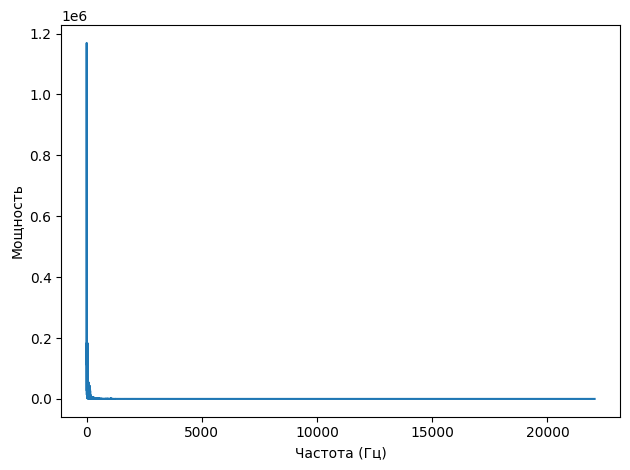

In [48]:
rain_spectrum = rain_segment.make_spectrum()
rain_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

По графику видно, что амплитуда падает с увеличением частоты, что означает, что это красный или розовый шум. Далее посмотрим на спектр мощности в логарифмической шкале.

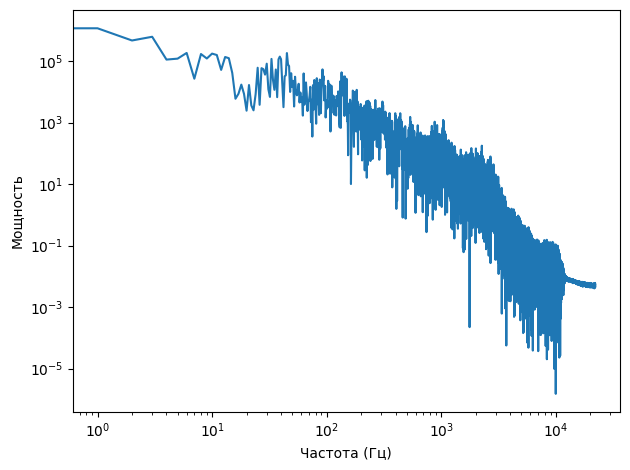

In [49]:
rain_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [50]:
rain_spectrum.estimate_slope().slope

-2.9074645768202108

Глядя на данный график можно сказать, что это красный шум, рассмотрим дополнительно еще один сегмент.

In [51]:
rain_segment2 = read_wave('swimming-pool.wav').segment(start=6.0, duration=1.0)
rain_segment2.make_audio()

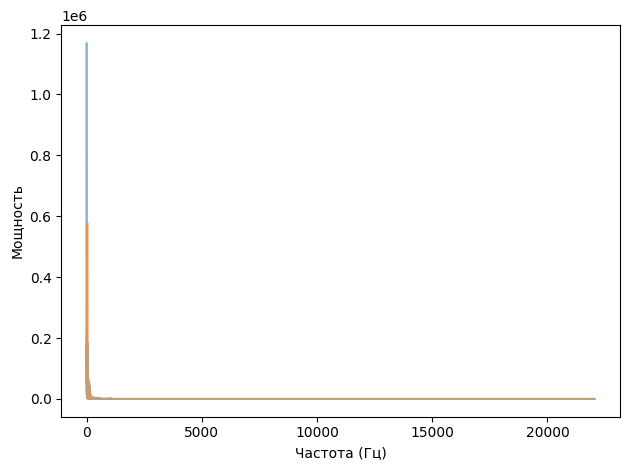

In [52]:
rain_spectrum2 = rain_segment2.make_spectrum()
rain_spectrum.plot_power(alpha=0.5)
rain_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

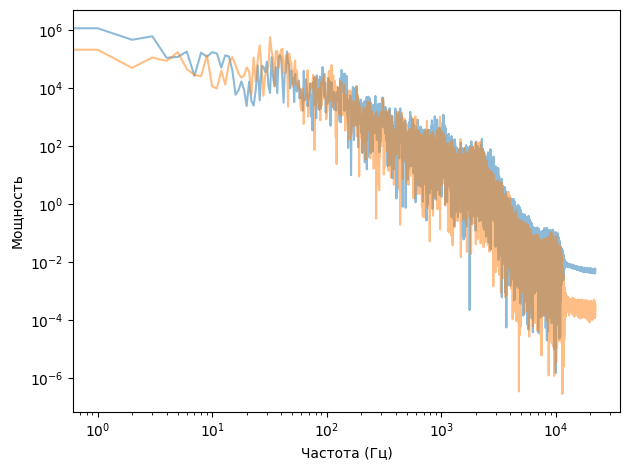

In [53]:
rain_spectrum.plot_power(alpha=0.5)
rain_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [54]:
rain_spectrum2.estimate_slope().slope

-3.819298670285485

Графики очень близки по своей форме и напоминают красный шум.

## Вой ветра

In [55]:
crickets_segment = read_wave('wind.wav').segment(start=2.0, duration=1.0)
crickets_segment.make_audio()

In [56]:
crickets_segment2 = read_wave('wind.wav').segment(start=6.0, duration=1.0)
crickets_segment2.make_audio()

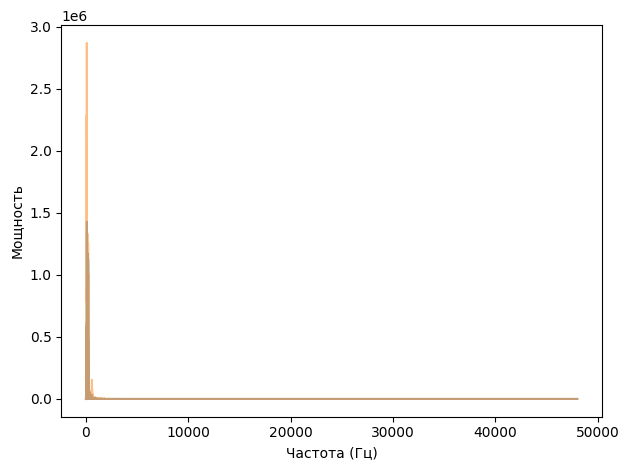

In [57]:
crickets_spectrum = crickets_segment.make_spectrum()
crickets_spectrum2 = crickets_segment2.make_spectrum()
crickets_spectrum.plot_power(alpha=0.5)
crickets_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

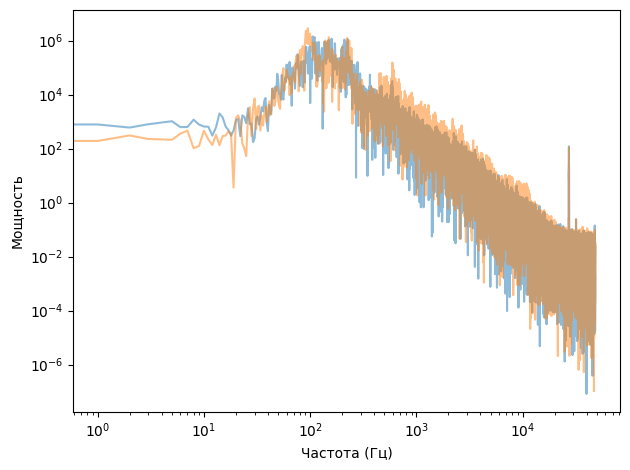

In [58]:
crickets_spectrum.plot_power(alpha=0.5)
crickets_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [59]:
crickets_spectrum.estimate_slope().slope

-2.7053210093364055

In [60]:
crickets_spectrum2.estimate_slope().slope

-2.8587422891369676

Точно пределить тип данного шума затруднительно, но форма графика так же напомнитает красный шум.

## Звуки радоиприемника

In [90]:
bowls_segment = read_wave('radio.wav').segment(start=2.0, duration=1.0)
bowls_segment.make_audio()

In [89]:
bowls_segment2 = read_wave('radio.wav').segment(start=5.0, duration=1.0)
bowls_segment2.make_audio()

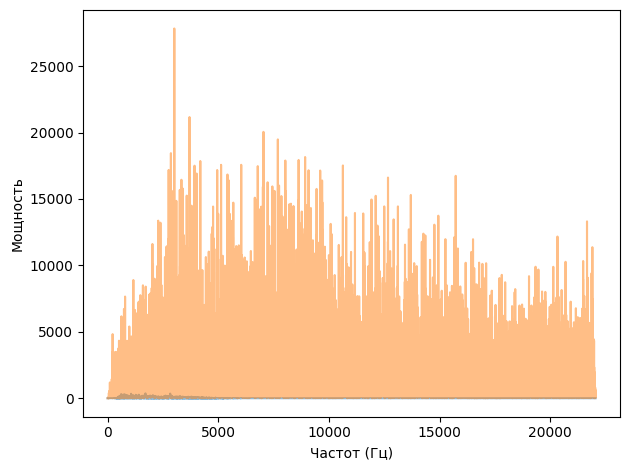

In [91]:
bowls_spectrum = bowls_segment.make_spectrum()
bowls_spectrum2 = bowls_segment2.make_spectrum()
bowls_spectrum.plot_power(alpha=0.5)
bowls_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частот (Гц)', ylabel='Мощность')

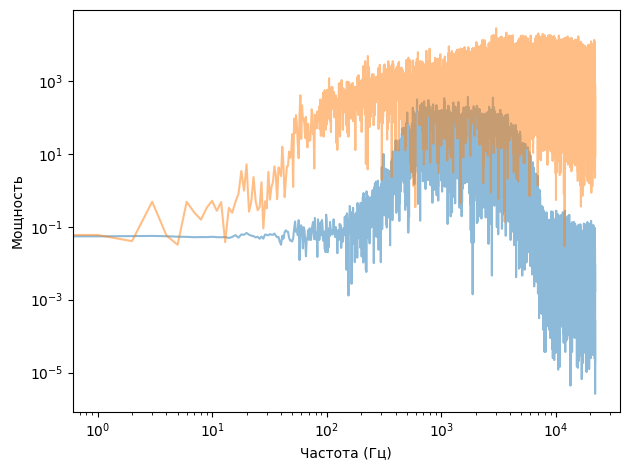

In [92]:
bowls_spectrum.plot_power(alpha=0.5)
bowls_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [65]:
bowls_spectrum.estimate_slope().slope

-2.2980152324511804

In [66]:
bowls_spectrum2.estimate_slope().slope

-0.9442319045445992

Перед нами белый шум.

# **Упражнение 4.2**

В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.
Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.
Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию *make_spectrogram*.

**Ход работы**
Код метода Бартлетта представлен ниже

In [67]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    spectrum = wave.make_spectrogram(seg_length, win_flag)
    segments = spectrum.spec_map.values()

    power_segments = []
    for segment in segments:
        power_segments.append(segment.power)
  
    hs = np.sqrt(sum(power_segments)/len(power_segments))
    fs = next(iter(segments)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

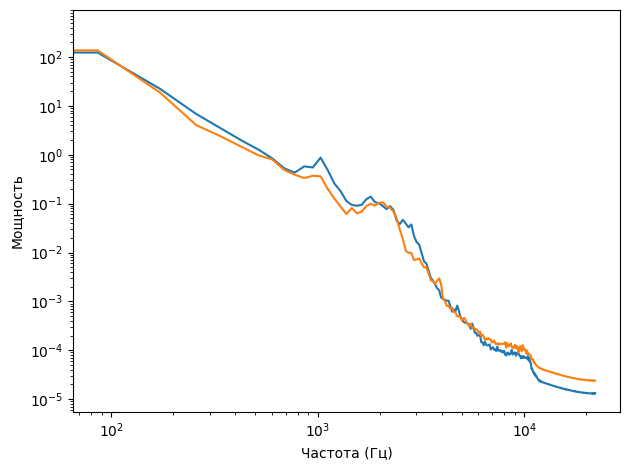

In [68]:
rain_res = bartlett_method(rain_segment)
rain_res2 = bartlett_method(rain_segment2)

crickets_res = bartlett_method(crickets_segment)
crickets_res2 = bartlett_method(crickets_segment2)

bowls_res = bartlett_method(bowls_segment)
bowls_res2 = bartlett_method(bowls_segment2)

rain_res.plot_power()
rain_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

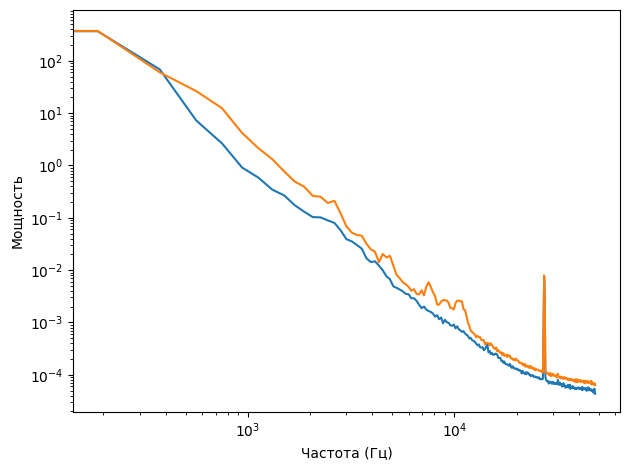

In [69]:
crickets_res.plot_power()
crickets_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

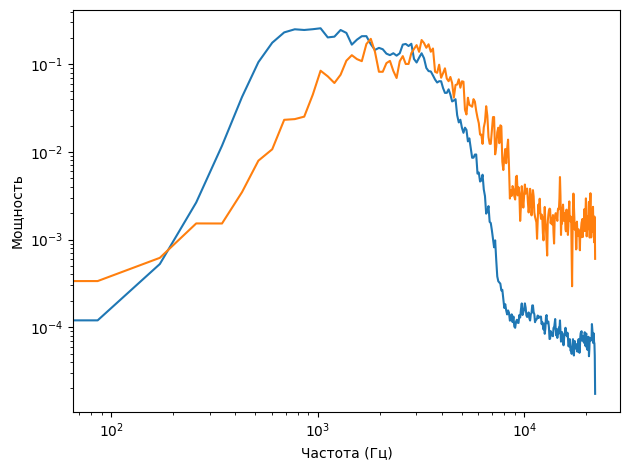

In [70]:
bowls_res.plot_power()
bowls_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

С помощью данного метод мы можем видеть зависимость между частотами и мощностью более чётче. На основе новых графиков можно заметить, что предположения из предыдущего управжения оправдались.

# **Упражнение 4.3**

На веб-странице [http://www.coindesk.com/price](http://www.coindesk.com/price) можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

**Ход работы**

In [71]:
data = pd.read_csv('bitstampUSD.csv')
data

,Timestamp,Weighted_Price
0,1325317920,4.390000
1,1325346600,4.390000
2,1325350740,4.526411
3,1325350800,4.580000
4,1325391360,4.580000
...,...,...
3613764,1617148560,58692.753339
3613765,1617148620,58693.226508
3613766,1617148680,58696.198496
3613767,1617148740,58761.866202


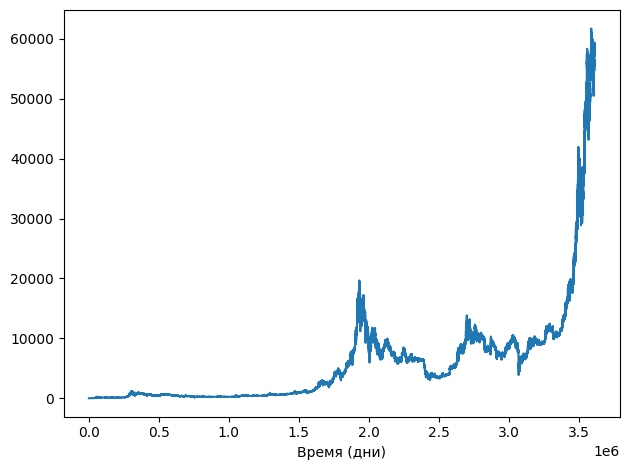

In [72]:
btc_wave = Wave(data['Weighted_Price'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

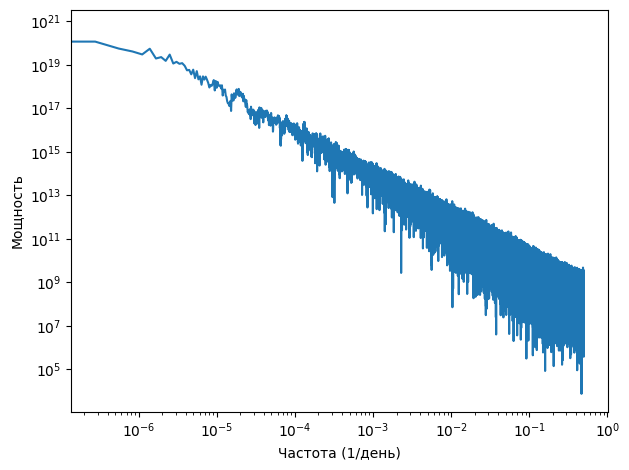

In [73]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота (1/день)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [74]:
btc_spectrum.estimate_slope().slope

-1.8056162277706673

Имеем наклон ~-1.8. Это розовый шум.

# **Упражнение 4.4**

Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующи частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый *UncorrelatedPoissonNoise*, наследующий *thinkdsp._Noise* и предоставляющий *evaluate*. Следует использовать *Np.random.poisson* для генерации случайный величин из распределения Пуассона. Параметр этой функции *lam* - это среднее число частиц за время каждого интервала. Можно использовать атрибут *amp* для определения *lam*. Например, при чатоте кадров 10 кГц и *amp* 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений *amp*, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.

**Ход работы**

Код класса представлен ниже

In [75]:
class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

Как и предлагается в задании сгенерируем данный шум для малых и больших значениях *amp* и посмотрим сопоставимы ли звуки с ожидаемыми.

In [76]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [77]:
like_white_noise_wave.make_audio()

Если прослушать звуки, то, действительно, в первом случае услышим что-то похоже на трещание счётчика Гейгера, а во втором - белый шум. Сравним графики и спектры сигналов.

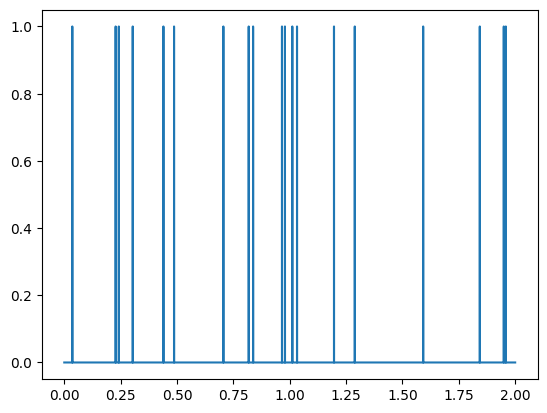

In [78]:
like_geiger_wave.plot()

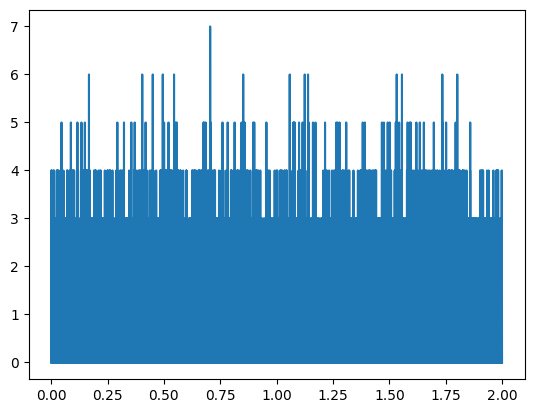

In [79]:
like_white_noise_wave.plot()

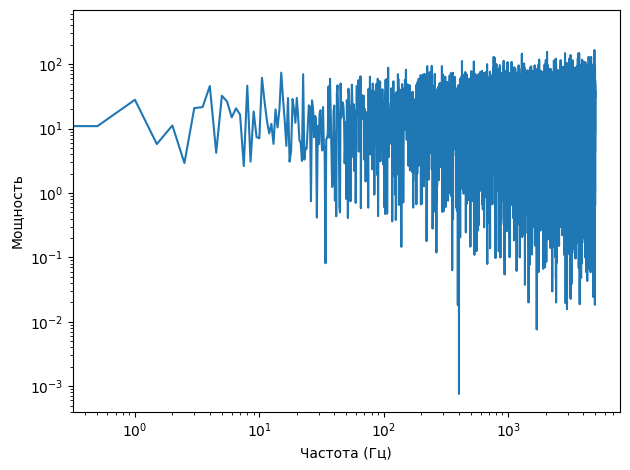

In [80]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [81]:
like_geiger_spectrum.estimate_slope().slope

-0.00735721126852369

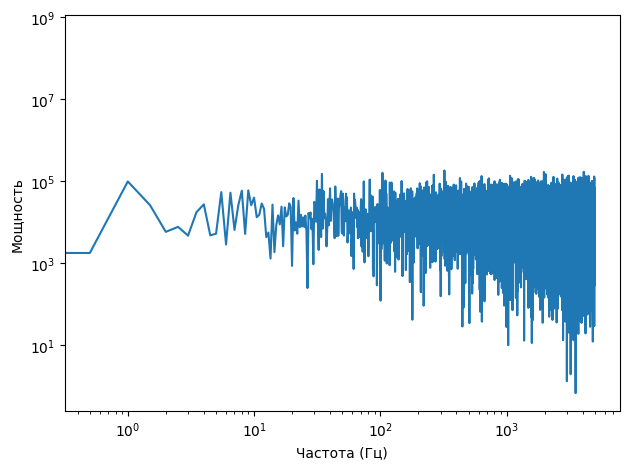

In [82]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [83]:
like_white_noise_spectrum.estimate_slope().slope

-0.01052604912713681

Как мы видим из полученных данных оба сигнала имеют уклон ~0, в связи с чем их можно считать белым шумом.

# **Упражнение 4.5**

В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.

**Ход работы**

Составленный алгоритм представлен ниже.

In [84]:
def generate_pink_noise(rows, columns=16):
    array = np.empty((rows, columns))
    array.fill(np.nan)
    array[0, :] = np.random.random(columns)
    array[:, 0] = np.random.random(rows)

    cols = np.random.geometric(0.5, rows)
    cols[cols >= columns] = 0
    new_rows = np.random.randint(rows, size=rows)
    array[new_rows, cols] = np.random.random(rows)

    data = pd.DataFrame(array)
    data.fillna(method='ffill', axis=0, inplace=True)
    total = data.sum(axis=1)

    return total.values

Проверим его на примере с 12000 значениями

C:\Users\79006\AppData\Local\Temp\ipykernel_18144\69124167.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', axis=0, inplace=True)


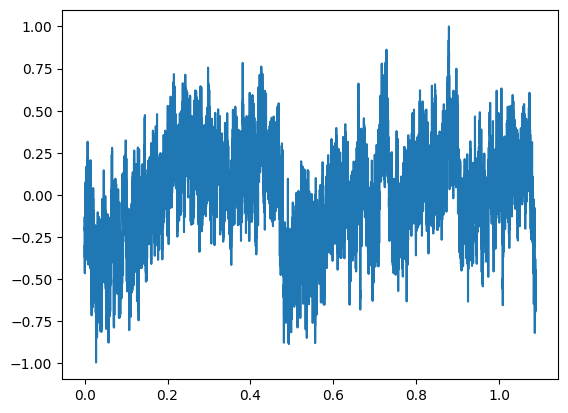

In [85]:
ys = generate_pink_noise(12000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [86]:
wave.make_audio()

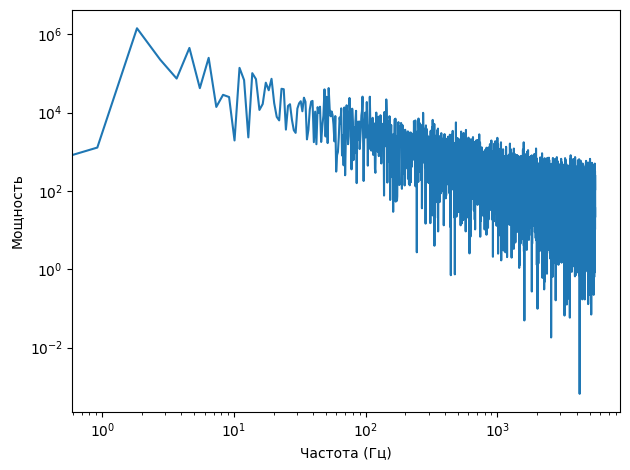

In [87]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [88]:
spectrum.estimate_slope().slope

-0.9861293404497758

Как мы видим уклон близок к -1, а это значит, что у нас получился розовый шум.